In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('titanic.csv',
                   usecols=['Age', 'Fare', 'Survived'])

data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:


# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],
    data['Survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape



((623, 2), (268, 2))

In [6]:
def impute_na(data, variable):
    # function to fill NA with a random sample

    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [8]:
# replace NA in both train and test sets

X_train['Age'] = impute_na(X_train,'Age')
X_test['Age'] = impute_na(X_test,'Age')
X_train['Fare'] = impute_na(X_train, 'Fare')
X_test['Fare'] = impute_na(X_test, 'Fare')

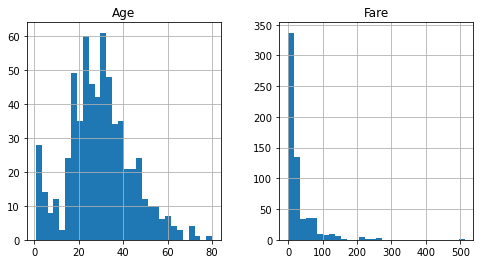

In [9]:
X_train[['Age','Fare']].hist(bins=30,figsize=(8,4))
plt.show()

In [11]:
# Equal frequency discretisation with scikit-learn
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
disc.fit(X_train[['Age','Fare']])

/home/zahoor/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [12]:
disc.bin_edges_

array([array([ 0.67      , 21.20756623, 36.27410497, 52.06497348, 80.        ]),
       array([  0.        ,  47.88407617, 153.5736125 , 369.65331667,
              512.3292    ])                                         ],
      dtype=object)

In [13]:
train_t = disc.transform(X_train[['Age', 'Fare']])

train_t = pd.DataFrame(train_t, columns = ['Age', 'Fare'])

train_t.head()

,Age,Fare
0,2.0,0.0
1,2.0,1.0
2,0.0,0.0
3,3.0,1.0
4,0.0,0.0


In [14]:
test_t = disc.transform(X_test[['Age', 'Fare']])

test_t = pd.DataFrame(test_t, columns = ['Age', 'Fare'])



Text(0, 0.5, 'Number of observations per bin')

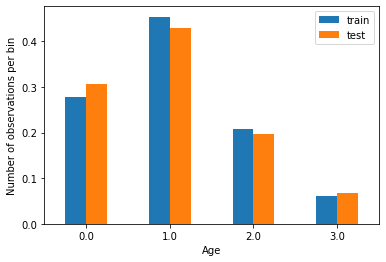

In [15]:
t1 = train_t.groupby(['Age'])['Age'].count() / len(train_t)
t2 = test_t.groupby(['Age'])['Age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


Text(0, 0.5, 'Number of observations per bin')

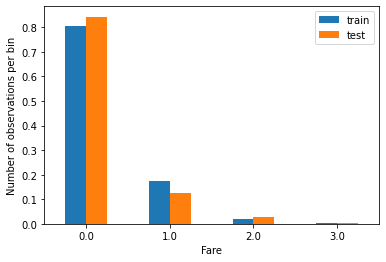

In [16]:
t1 = train_t.groupby(['Fare'])['Fare'].count() / len(train_t)
t2 = test_t.groupby(['Fare'])['Fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')